# Linear Regression with One Variable
This notebook performs linear regression to predict taxi trip prices based on trip distance.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [5]:
# Load dataset
df = pd.read_csv('taxi_trip_pricing.csv')
df = df[['Trip_Distance_km', 'Trip_Price']].dropna()

In [6]:
# Display first few rows
df.head()

,Trip_Distance_km,Trip_Price
0,19.35,36.2624
2,36.87,52.9032
3,30.33,36.4698
5,8.64,60.2028
6,3.85,11.2645


## Data Visualization
Scatter plot to observe the relationship between `Trip_Distance_km` and `Trip_Price`.

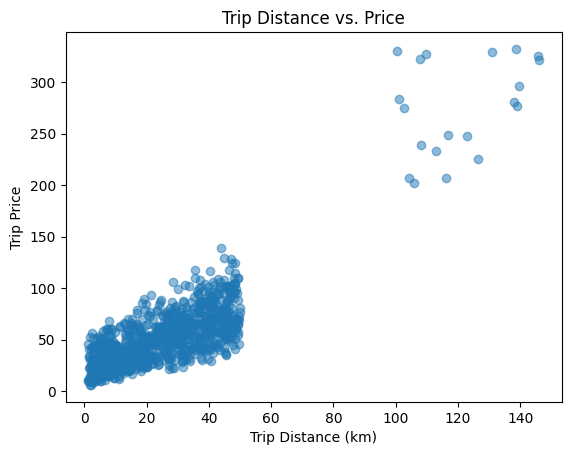

In [7]:
plt.scatter(df['Trip_Distance_km'], df['Trip_Price'], alpha=0.5)
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Price')
plt.title('Trip Distance vs. Price')
plt.show()

## Splitting the Data
We split the data into training (80%) and testing (20%) sets.

In [8]:
# Define independent (X) and dependent (y) variables
X = df[['Trip_Distance_km']]
y = df['Trip_Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((720, 1), (181, 1))

## Training the Linear Regression Model

In [13]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Display model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: 10.784771132785117
Coefficient: 1.6925377079347588


## Model Evaluation

In [15]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 634.2833236664817
R² Score: 0.6909115960812842


## Visualizing the Regression Line

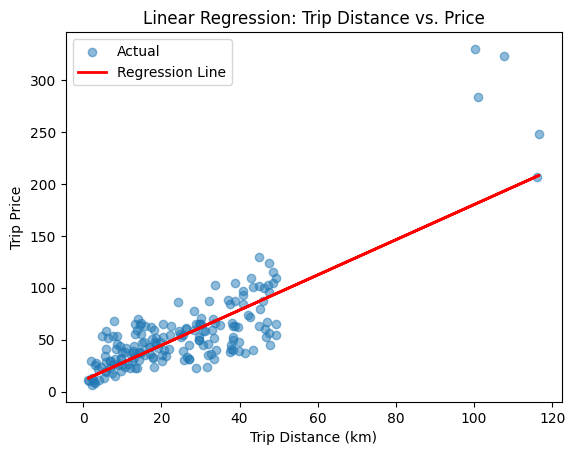

In [16]:
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Price')
plt.title('Linear Regression: Trip Distance vs. Price')
plt.legend()
plt.show()